## Assignment 1
### Name: Sourodeep Datta
### Roll Number: 21CS10064

In [43]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
df = pd.read_excel('../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx')
print(df.shape) 

(2500, 13)


In [29]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


Separating y from Dataset

In [30]:
y = df['Class']
y.head()

0    Çerçevelik
1    Çerçevelik
2    Çerçevelik
3    Çerçevelik
4    Çerçevelik
Name: Class, dtype: object

In [31]:
df = df.drop(['Class'], axis = 1)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557


In [32]:
mapping = {'Çerçevelik' : 1, 'Ürgüp Sivrisi' : 0}
y[y == 'Çerçevelik'] = 1
y[y == 'Ürgüp Sivrisi'] = 0

Normalizing Dataset

In [33]:
df_mean = df.mean(axis = 0)
df_mean.head(n = 12)

Area                 80658.220800
Perimeter             1130.279015
Major_Axis_Length      456.601840
Minor_Axis_Length      225.794921
Convex_Area          81508.084400
Equiv_Diameter         319.334230
Eccentricity             0.860879
Solidity                 0.989492
Extent                   0.693205
Roundness                0.791533
Aspect_Ration            2.041702
Compactness              0.704121
dtype: float64

In [34]:
df_std = df.std()
df_std.head(n = 12)

Area                 13664.510228
Perimeter              109.256418
Major_Axis_Length       56.235704
Minor_Axis_Length       23.297245
Convex_Area          13764.092788
Equiv_Diameter          26.891920
Eccentricity             0.045167
Solidity                 0.003494
Extent                   0.060914
Roundness                0.055924
Aspect_Ration            0.315997
Compactness              0.053067
dtype: float64

In [35]:
df_normalized = (df - df_mean) / df_std
df_normalized.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784346,-2.215312,-2.319760,-0.238488,-1.792859,-1.920790,-2.729389,0.202771,0.855235,1.873388,-1.774708,2.196840
1,-0.294721,-0.568690,-0.700776,0.362016,-0.307182,-0.259291,-0.739015,0.603505,0.359451,0.938189,-0.824699,0.840062
2,-0.661218,-0.432853,-0.369321,-0.633089,-0.642620,-0.645251,0.310414,-1.085301,0.768227,-0.431528,0.074044,-0.211441
3,-1.039205,-1.265171,-1.334349,-0.140048,-1.045480,-1.057728,-1.075541,0.202771,0.761660,1.020444,-1.035144,1.098227
4,-1.064892,-1.209384,-1.293014,-0.229230,-1.045553,-1.086331,-0.933846,-1.285668,-0.295574,0.755799,-0.950650,0.971971


Adding a bias feature to dataset, to simplify calculations later

In [36]:
df_normalized.insert(12, 'bias', 1)
df_normalized.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,bias
0,-1.784346,-2.215312,-2.319760,-0.238488,-1.792859,-1.920790,-2.729389,0.202771,0.855235,1.873388,-1.774708,2.196840,1
1,-0.294721,-0.568690,-0.700776,0.362016,-0.307182,-0.259291,-0.739015,0.603505,0.359451,0.938189,-0.824699,0.840062,1
2,-0.661218,-0.432853,-0.369321,-0.633089,-0.642620,-0.645251,0.310414,-1.085301,0.768227,-0.431528,0.074044,-0.211441,1
3,-1.039205,-1.265171,-1.334349,-0.140048,-1.045480,-1.057728,-1.075541,0.202771,0.761660,1.020444,-1.035144,1.098227,1
4,-1.064892,-1.209384,-1.293014,-0.229230,-1.045553,-1.086331,-0.933846,-1.285668,-0.295574,0.755799,-0.950650,0.971971,1


In [37]:
train_df = df_normalized.sample(frac = 0.5, random_state = 218)
val_df = df_normalized.drop(train_df.index).sample(frac = 0.6, random_state = 218)
test_df = df_normalized.drop(train_df.index).drop(val_df.index)

In [38]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(1250, 13)
(750, 13)
(500, 13)


In [40]:
y_train = y[train_df.index]
y_val = y[val_df.index]
y_test = y[test_df.index]

In [41]:
train_df.reset_index(drop = True, inplace=True)
val_df.reset_index(drop = True, inplace=True)
test_df.reset_index(drop = True, inplace=True)
y_train.reset_index(drop = True, inplace=True)
y_val.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

In [44]:
X_train = np.array(train_df)
X_val = np.array(val_df)
X_test = np.array(test_df)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

## Iterative Solution
Defining Model

In [147]:
class LogisticRegressionModel:
    def __init__(self, X_train, y_train, X_val, y_val, alpha):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.theta = np.random.rand(X_train.shape[1])
        self.alpha = alpha
        self.train_loss = []
        self.val_loss = []
        
    def sigmoid(self, x):
        x = x.astype(float)
        return 1 / (1 + np.exp(-x))
        
    def gradient(self):
        y_hat = np.matmul(self.X_train, self.theta)
        y_hat = self.sigmoid(y_hat)
        gradient = np.sum((y_hat - self.y_train)[:, np.newaxis] * self.X_train, axis = 0) / self.X_train.shape[0]
        return gradient.T
        
    def step(self):
        self.theta = self.theta - self.alpha * self.gradient()
        
    def loss(self, X, y):
        y_hat = np.matmul(X, self.theta)
        y_hat = self.sigmoid(y_hat)
        loss = np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat), axis = 0) / X.shape[0]
        return loss
        
    def train(self, epochs):
        for i in range(epochs):
            self.step()
            train_loss = self.loss(self.X_train, self.y_train)
            val_loss = self.loss(self.X_val, self.y_val)
            self.train_loss.append(train_loss)
            self.val_loss.append(val_loss)
            if i % 100 == 0:
                print("Epoch: {}, Train Loss: {}, Val Loss: {}".format(i, train_loss, val_loss))
                
    def predict(self, X):
        y_hat = np.matmul(X, self.theta)
        y_hat = self.sigmoid(y_hat)
        return y_hat

Function for plotting model

In [148]:
def plot(model):
    plt.plot(np.arange(1, len(model.train_loss) + 1), model.train_loss, label='Trainging Loss')
    plt.plot(np.arange(1, len(model.val_loss) + 1), model.val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()

Functions for Metrics

In [167]:
def mean_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    return np.sum(y_true & y_pred) / np.sum(y_pred)

def recall(y_true, y_pred):
    return np.sum(y_true & y_pred) / np.sum(y_true)

In [161]:
np.random.seed(218)
model = LogisticRegressionModel(X_train, y_train, X_val, y_val, 0.01)

In [162]:
model.train(350)

Epoch: 0, Train Loss: 1.769830561754612, Val Loss: 1.826277377208884
Epoch: 10, Train Loss: 1.5850045409594207, Val Loss: 1.6302286035115405
Epoch: 20, Train Loss: 1.4147255157302385, Val Loss: 1.4497581155456225
Epoch: 30, Train Loss: 1.2601919777334976, Val Loss: 1.2862009499608296
Epoch: 40, Train Loss: 1.1222434621727837, Val Loss: 1.1404550484142815
Epoch: 50, Train Loss: 1.0011961428673206, Val Loss: 1.012802861587706
Epoch: 60, Train Loss: 0.8967460644337488, Val Loss: 0.9028367332559429
Epoch: 70, Train Loss: 0.8079823217791331, Val Loss: 0.809519181325361
Epoch: 80, Train Loss: 0.7335054331549609, Val Loss: 0.7313421653811722
Epoch: 90, Train Loss: 0.6716099086580897, Val Loss: 0.6665203877420589
Epoch: 100, Train Loss: 0.6204818862651196, Val Loss: 0.6131732171148027
Epoch: 110, Train Loss: 0.5783672052946383, Val Loss: 0.5694718337758926
Epoch: 120, Train Loss: 0.5436819210743664, Val Loss: 0.5337404232567569
Epoch: 130, Train Loss: 0.5150616013341374, Val Loss: 0.5045108198

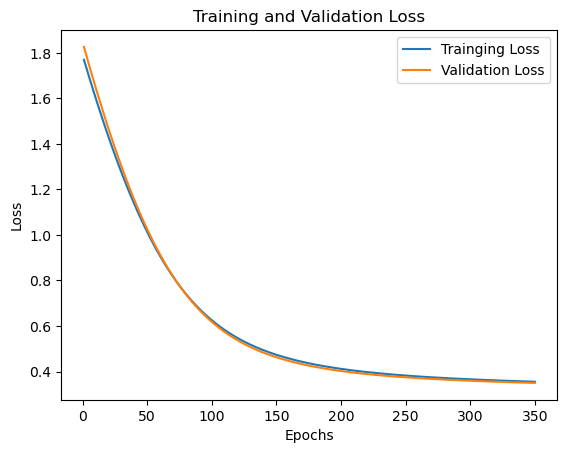

In [163]:
plot(model)

In [174]:
y_hat = model.predict(X_test)
y_pred = np.zeros(y_hat.shape, dtype = 'int')
y_pred[y_hat > 0.5] = 1
y_pred[y_hat <= 0.5] = 0

In [175]:
print("The mean accuracy for the test set is: " + str(mean_accuracy(y_test, y_pred)))
print("The precision for the test set is: " + str(precision(y_test, y_pred)))
print("The recall for the test set is: " + str(recall(y_test, y_pred)))

The mean accuracy for the test set is: 0.828
The precision for the test set is: 0.8175438596491228
The recall for the test set is: 0.8726591760299626
